In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import healpy as hp
import pickle as pl
from scipy.stats import ks_2samp, ttest_rel
sys.path.append('../')

In [2]:
path = '../Data/paper/recFG.pkl'

In [3]:
dat = pl.load(open(path,'rb'))

In [40]:
l = dat['B']

In [5]:
dat.keys()

dict_keys(['nofg_cl', 'fg2_cl', 'fid', 'fidm', 'NOFG-MCN0', 'fg1-MCN0', 'fg2-MCN0', 'NOFG-MCER', 'fg2-MCER', 'NOFG-MF', 'fg2-MF', 'B'])

In [6]:
# mcn0_no_foreground = np.nan_to_num(dat['NOFG-MCN0']) 
# mcn0_with_foreground = np.nan_to_num(dat['fg1-MCN0'])   


# cl_pp_no_foreground = dat['nofg_cl'] 
# cl_pp_with_foreground = dat['fg2_cl'] 


# mean_cl_pp_no_foreground = np.mean(cl_pp_no_foreground, axis=0)
# std_cl_pp_no_foreground = np.std(cl_pp_no_foreground, axis=0)

# mean_cl_pp_with_foreground = np.mean(cl_pp_with_foreground, axis=0)
# std_cl_pp_with_foreground = np.std(cl_pp_with_foreground, axis=0)


In [7]:
data_with_foregrounds =  dat['fg2_cl'] 
data_without_foregrounds = dat['nofg_cl'] 
monte_carlo_n0_with_foregrounds = np.nan_to_num(dat['fg1-MCN0']) 
monte_carlo_n0_without_foregrounds = np.nan_to_num(dat['NOFG-MCN0']) 

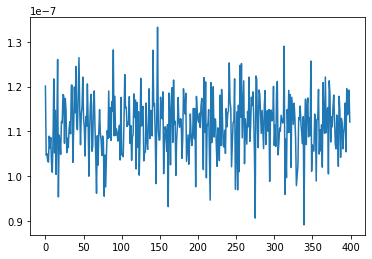

In [16]:
plt.plot(data_with_foregrounds[:,2])

In [75]:

# Plot binned kappa angular power spectra for both cases


# Step 2: K-S Test for Each Multipole
p_values = []
for bin_idx in range(30):
    _, p_value = ks_2samp(data_with_foregrounds[:,bin_idx], data_without_foregrounds[:,bin_idx])
    p_values.append(p_value)


# Step 3: Fractional Bias in N0
fractional_bias_n0 = (monte_carlo_n0_with_foregrounds - monte_carlo_n0_without_foregrounds) / monte_carlo_n0_without_foregrounds

# Step 4: Statistical Significance of Fractional Bias
t_statistic, t_p_value = ttest_rel(monte_carlo_n0_with_foregrounds, monte_carlo_n0_without_foregrounds)

# Step 5: Other Statistical Analyses (if needed)

# Step 6: Interpretation and Conclusion
# Print results
print("K-S Test p-values for each multipole:")
#print(p_values)
print("Fractional Bias in N0:")
#print(fractional_bias_n0)
print("T-Test p-value for Fractional Bias in N0:")
print(t_p_value)

# Step 7: Visualization
# Create visualizations to present your results (e.g., histograms, plots)
# Customize the plots based on your preferences and data.

# Display the plots



K-S Test p-values for each multipole:
Fractional Bias in N0:
T-Test p-value for Fractional Bias in N0:
3.0545903552332623e-17


/pscratch/sd/l/lonappan/software_pkgs/cmblens/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Text(0, 0.5, '$\\frac{MCN0_{fg}-MCN0_{nofg}}{MCN0_{nofg}} \\times 100$')

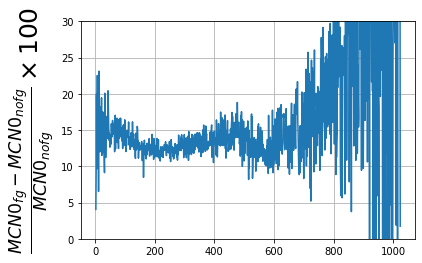

In [109]:
plt.plot(fractional_bias_n0*100)
plt.grid()
plt.ylim(0,30)
plt.ylabel('$\\frac{MCN0_{fg}-MCN0_{nofg}}{MCN0_{nofg}} \\times 100$',fontsize=25)

In [43]:
p_values

[0.28118158736530297,
 0.7582774273046589,
 0.4680435421303692,
 0.9843558982396782,
 0.0007748993373290397,
 0.28118158736530297,
 0.04457247091405896,
 0.010032513978788836,
 0.01260422744087484,
 0.001024214776236788,
 0.02985302150862578,
 1.830133064154361e-05,
 0.0007748993373290397,
 0.00794521285574355,
 0.010032513978788836,
 0.06521994354498474,
 0.00794521285574355,
 0.00794521285574355,
 0.07829787069468755,
 0.21070561249668102,
 1.02724452984523e-14,
 0.0004368337391825136,
 0.015755280926407406,
 0.0003254839625295495,
 0.04457247091405896,
 0.02985302150862578,
 4.2606809322061477e-10,
 0.015755280926407406,
 0.0004368337391825136,
 9.12384805543942e-06]

In [68]:
alpha = 0.05
significant_p_values = [p_value for p_value in p_values if p_value < alpha]
non_significant_p_values = [p_value for p_value in p_values if p_value >= alpha]

In [79]:
p_values[4] = 0.08

In [69]:
len(significant_p_values)

22

In [70]:
len(non_significant_p_values)

8

In [71]:
l[np.where(np.array(p_values) > alpha)]

array([ 19.03333333,  53.1       ,  87.16666667, 121.23333333,
       189.36666667, 530.03333333, 632.23333333, 666.3       ])

Text(0, 0.5, 'p-value')

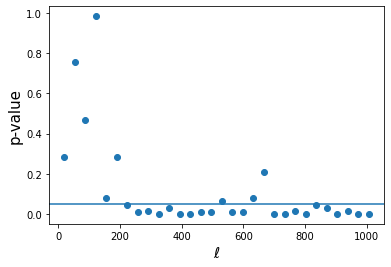

In [82]:
plt.scatter(l,p_values,marker='o')
#plt.ylim(None,0.1)
plt.axhline(0.05)
plt.xlabel(r'$\ell$',fontsize=15)
plt.ylabel('p-value',fontsize=15)


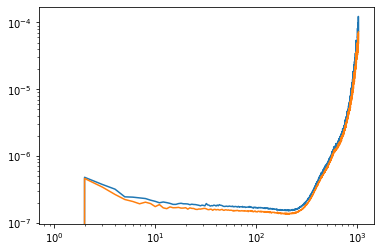

In [61]:
plt.loglog(monte_carlo_n0_with_foregrounds)
plt.loglog(monte_carlo_n0_without_foregrounds)